In [1]:
'''Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute
confusion matrix, accuracy, error rate, precision and recall on the given dataset.'''

'Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute\nconfusion matrix, accuracy, error rate, precision and recall on the given dataset.'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score,precision_score,recall_score
import seaborn as sns

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.size

2000

In [7]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
pre=precision_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)

In [13]:
print("Mean Squared Erroe :",mse)
print("Accuracy Score :",acc)
print("Precision Score :",pre)
print("Recall Score :",recall)

Mean Squared Erroe : 0.07
Accuracy Score : 0.93
Precision Score : 0.8787878787878788
Recall Score : 0.90625


Confusion matrix :


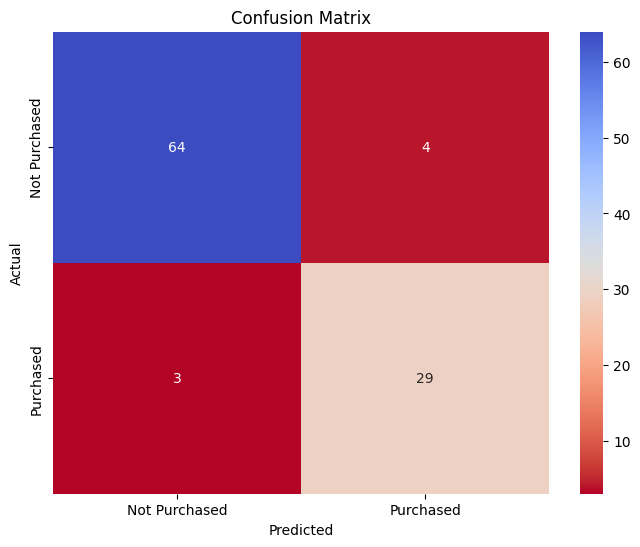

In [14]:
print("Confusion matrix :")
cm
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm_r', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()